# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Stav 0667
# student 2: Noy 5807
# student 3: Priel 1718


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
#import train file
train_file='titanic_train.csv'
df_train=pd.read_csv(train_file)

X_train=df_train.drop(['Survived'],axis=1)
y_train=df_train['Survived']

df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
#import test file
test_file='titanic_test.csv'
df_test=pd.read_csv(test_file)

X_test=df_test.drop(['Survived'],axis=1)
y_test=df_test['Survived']

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
train_stats = df_train.describe(include='all')
test_stats = df_test.describe(include='all')
print("\nTrain set statistics:")
print(train_stats)
print("\nTest set statistics:")
print(test_stats)


Train set statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

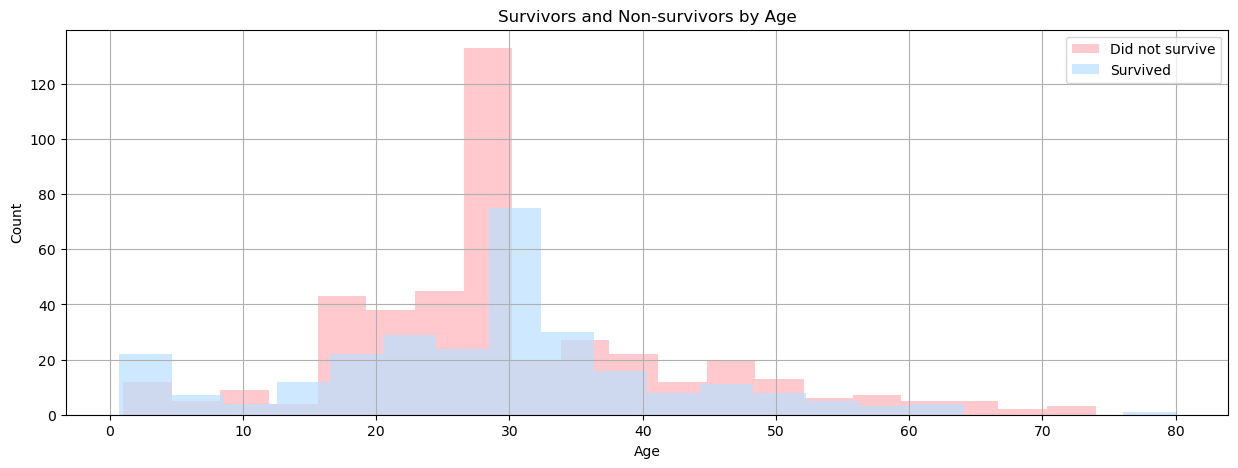

In [6]:
# Plotting histogram of survivors and non-survivors by age
plt.figure(figsize=(15,5))

# Plot histogram for non-survivors
df_train[df_train['Survived'] == 0]['Age'].hist(alpha=0.7, color='#ffb3ba', bins=20, label='Did not survive')

# Plot histogram for survivors
df_train[df_train['Survived'] == 1]['Age'].hist(alpha=0.7, color='#bae1ff', bins=20, label='Survived')

plt.title('Survivors and Non-survivors by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()   

In [7]:
pclass_survived_crosstab = pd.crosstab(df_train['Pclass'], df_train['Survived'],normalize='index')
pclass_survived_crosstab.columns = ['Not Survived', 'Survived']
pclass_survived_crosstab

,Not Survived,Survived
Pclass,,
1,0.365169,0.634831
2,0.541096,0.458904
3,0.739691,0.260309


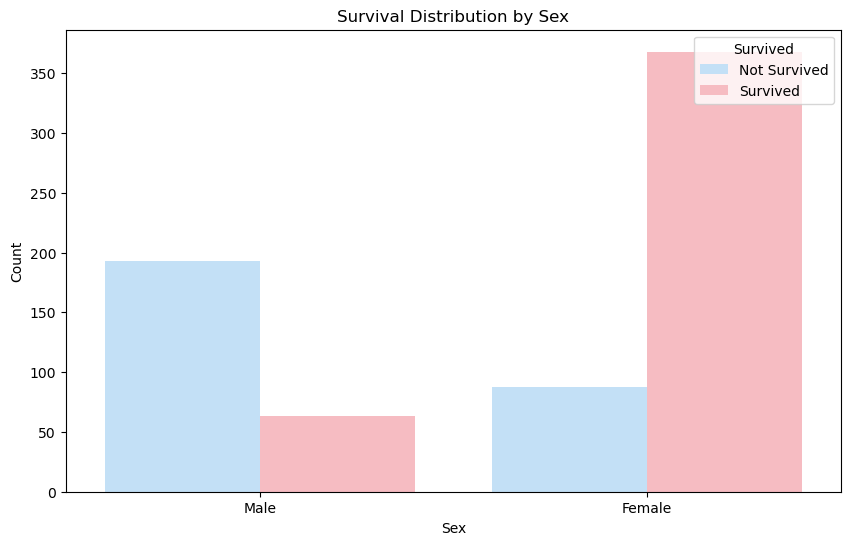

In [8]:
# Convert the 'Survived' column to string type if it contains integer values
df_train['Survived'] = df_train['Survived'].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Sex', hue='Survived',palette=['#bae1ff','#ffb3ba'])
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
#Scaling

In [10]:
def MinMaxScaling(X_train,X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

X_train_scaled,X_test_scaled = MinMaxScaling(X_train,X_test)

In [11]:
def ComplexFeatureEngineering(X_train, X_test):
    X_cfe_train = X_train.copy()
    X_cfe_test = X_test.copy()
    
    X_cfe_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1
    X_cfe_train = X_cfe_train.drop(['SibSp', 'Parch'], axis=1)
    
    X_cfe_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1    
    X_cfe_test = X_cfe_test.drop(['SibSp', 'Parch'], axis=1)
    
    return X_cfe_train, X_cfe_test

X_cfe_train, X_cfe_test = ComplexFeatureEngineering(X_train, X_test)


In [12]:
print(X_cfe_train)

     Pclass  Sex        Age      Fare  Embarked  FamilySize
0         1    0  54.000000   78.2667         1           2
1         2    0  45.000000   13.5000         0           1
2         3    1  20.000000    9.5000         0           1
3         3    1  36.000000    7.8958         0           1
4         3    1  22.000000    8.0500         0           1
..      ...  ...        ...       ...       ...         ...
707       1    1  54.000000   51.8625         0           1
708       3    1  14.000000   46.9000         0           8
709       2    0   6.000000   33.0000         0           2
710       2    1  29.699118    0.0000         0           1
711       1    0  25.000000  151.5500         0           4

[712 rows x 6 columns]


In [13]:
#KNN

In [14]:
def grid_knn_no_scaling():
    model=KNeighborsClassifier()
    param_grid = {
    'metric': ['euclidean','manhattan', 'chebyshev'],
    'n_neighbors': [3, 4, 7, 9]}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return grid_search.best_params_,grid_search.best_score_

In [15]:
grid_knn_no_scaling()

({'metric': 'manhattan', 'n_neighbors': 7}, 0.644140534517893)

In [16]:
def grid_knn_scaling():
    model=KNeighborsClassifier()
    param_grid = {
    'metric': ['euclidean','manhattan', 'chebyshev'],
    'n_neighbors': [3, 4, 7, 9]}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return grid_search.best_params_,grid_search.best_score_

In [17]:
grid_knn_scaling()

({'metric': 'manhattan', 'n_neighbors': 3}, 0.7363487224503041)

In [18]:
#TREE

In [19]:
def grid_tree():
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,7,9],
    }
    
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return grid_search.best_params_,grid_search.best_score_

In [20]:
grid_tree()

({'criterion': 'entropy', 'max_depth': 4}, 0.7508166157509389)

In [21]:
def grid_tree_ComplexFE():
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,7,9],
    }
    
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_cfe_train, y_train)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return grid_search.best_params_,grid_search.best_score_

In [22]:
grid_tree_ComplexFE()

({'criterion': 'entropy', 'max_depth': 4}, 0.7460884665392638)

In [23]:
#F1

In [24]:
def f1_score_knn_no_scaling(k,dist_metric):
    model = KNeighborsClassifier(n_neighbors=k,metric=dist_metric)
    scores_valid = cross_val_score(model,X_train,y_train,cv=5)
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    return score_f1,scores_valid.mean()

In [25]:
def f1_score_knn(k,dist_metric):
    model = KNeighborsClassifier(n_neighbors=k,metric=dist_metric)
    scores_valid = cross_val_score(model,X_train_scaled,y_train,cv=5)
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    print(score_f1,scores_valid.mean())
    return score_f1,scores_valid.mean()

In [26]:
def f1_score_tree_no_scaling(crit,Maxdepth):
    model = DecisionTreeClassifier(criterion=crit,max_depth=Maxdepth)
    scores_valid = cross_val_score(model,X_train,y_train,cv=5)
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    return score_f1,scores_valid.mean()

In [27]:
def f1_score_tree_ComplexFE(crit,Maxdepth):
    model = DecisionTreeClassifier(criterion=crit,max_depth=Maxdepth)
    scores_valid = cross_val_score(model,X_cfe_train,y_train,cv=5)
    y_pred = cross_val_predict(model, X_cfe_train, y_train, cv=5)
    score_f1 = f1_score(y_train,y_pred , average='weighted')
    return score_f1,scores_valid.mean()

In [28]:
#data before scaling

In [29]:
data = [{'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},       
        {'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},           
        {'model': 'knn', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},       
        {'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0}
        ]
stat_scores_no_scaling = pd.DataFrame(data)
for i in stat_scores_no_scaling.index:
    model = stat_scores_no_scaling.loc[i, 'model']
    param_1 = stat_scores_no_scaling.loc[i, 'Hyper_Parameter_1']
    param_2 = stat_scores_no_scaling.loc[i, 'Hyper_Parameter_2']
    if model == 'knn':
        f1_s, score_val = f1_score_knn_no_scaling(param_1, param_2)
    elif model == 'Dec Tree':
        f1_s, score_val = f1_score_tree_no_scaling(param_2, param_1)
    stat_scores_no_scaling.loc[i, 'f1_score'] = f1_s
    stat_scores_no_scaling.loc[i, 'Cross_Validation_Mean_Score'] = score_val

display(stat_scores_no_scaling.style.set_caption("No Scaling"))

,model,Hyper_Parameter_1,Hyper_Parameter_2,f1_score,Cross_Validation_Mean_Score
0,knn,3,euclidean,0.688492,0.692377
1,knn,4,euclidean,0.660004,0.678361
2,knn,7,euclidean,0.696745,0.700877
3,knn,9,euclidean,0.687604,0.692426
4,knn,3,manhattan,0.721832,0.724732
5,knn,4,manhattan,0.686217,0.703684
6,knn,7,manhattan,0.730348,0.733222
7,knn,9,manhattan,0.719474,0.721984
8,knn,3,chebyshev,0.681353,0.683965
9,knn,4,chebyshev,0.662143,0.678332


In [30]:
#data after scaling

In [31]:
data = [{'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},       
        {'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'euclidean','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},           
        {'model': 'knn', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},       
        {'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'manhattan','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'knn', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'chebyshev','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        ]
stat_scores = pd.DataFrame(data)
for i in stat_scores.index:
    param_1 = stat_scores.loc[i, 'Hyper_Parameter_1']
    param_2 = stat_scores.loc[i, 'Hyper_Parameter_2']
    f1_s, score_val = f1_score_knn(param_1, param_2)   
    stat_scores.loc[i, 'f1_score'] = f1_s
    stat_scores.loc[i, 'Cross_Validation_Mean_Score'] = score_val
display(stat_scores.style.set_caption("post Scaling"))

0.7939630662401924 0.7949670048261599
0.780443212218493 0.7865359992120555
0.779112009003524 0.7823500443218754
0.7740536796084084 0.7781443908204472
0.7966322791896748 0.7977839062346105
0.7859612790473175 0.7921402541120852
0.7861344597878606 0.7893529006205062
0.7771403002883565 0.7809415936176499
0.7781876104629679 0.7795134443021767
0.7743916184552806 0.7808923470895301
0.7842780793670834 0.7865359992120555
0.7784056490801244 0.7808923470895301


,model,Hyper_Parameter_1,Hyper_Parameter_2,f1_score,Cross_Validation_Mean_Score
0,knn,3,euclidean,0.793963,0.794967
1,knn,4,euclidean,0.780443,0.786536
2,knn,7,euclidean,0.779112,0.782350
3,knn,9,euclidean,0.774054,0.778144
4,knn,3,manhattan,0.796632,0.797784
5,knn,4,manhattan,0.785961,0.792140
6,knn,7,manhattan,0.786134,0.789353
7,knn,9,manhattan,0.777140,0.780942
8,knn,3,chebyshev,0.778188,0.779513
9,knn,4,chebyshev,0.774392,0.780892


In [32]:
#data after complex feature engineering

In [33]:
data = [{'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'entropy','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 3,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 4,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 7,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0},
        {'model': 'Dec Tree', 'Hyper_Parameter_1': 9,'Hyper_Parameter_2': 'gini','f1_score': 0.0,'Cross_Validation_Mean_Score': 0.0}
        ]
stat_scores_cfe = pd.DataFrame(data)
for i in stat_scores_cfe.index:
    model = stat_scores_cfe.loc[i, 'model']
    param_1 = stat_scores_cfe.loc[i, 'Hyper_Parameter_1']
    param_2 = stat_scores_cfe.loc[i, 'Hyper_Parameter_2']
    f1_s, score_val = f1_score_tree_ComplexFE(param_2, param_1)
    stat_scores_cfe.loc[i, 'f1_score'] = f1_s
    stat_scores_cfe.loc[i, 'Cross_Validation_Mean_Score'] = score_val

display(stat_scores_cfe.style.set_caption("After Feature Engineering"))

,model,Hyper_Parameter_1,Hyper_Parameter_2,f1_score,Cross_Validation_Mean_Score
0,Dec Tree,3,entropy,0.797541,0.801950
1,Dec Tree,4,entropy,0.808150,0.811770
2,Dec Tree,7,entropy,0.792099,0.797745
3,Dec Tree,9,entropy,0.790656,0.794977
4,Dec Tree,3,gini,0.806641,0.808973
5,Dec Tree,4,gini,0.805979,0.807564
6,Dec Tree,7,gini,0.780304,0.783729
7,Dec Tree,9,gini,0.788808,0.792101


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [34]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight='balanced')
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

## Part 5 - Apply on test and show model performance estimation

In [35]:
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1:", f1)

f1: 0.8467438533991849


In [36]:
print(y_pred[:5]) 

[0 0 0 1 0]


In [37]:
cm = (confusion_matrix(y_test, y_pred))
cmdf=pd.DataFrame(cm)
print("Confusion Matrix:")

cmdf.index = ['Actual False','Actual True']
cmdf.columns = ['Predicted False','Predicted True']
display(cmdf)

Confusion Matrix:


,Predicted False,Predicted True
Actual False,108,10
Actual True,17,44


In [38]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8148148148148148
Recall: 0.7213114754098361


In [39]:
f1_s,cv_mean = f1_score_tree_no_scaling('gini',3)
print(f"f1_score = {f1_s}")
print(f"cross validation = {cv_mean}")

f1_score = 0.8053074173444678
cross validation = 0.8089628681177977
